In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
df[['year', 'month']] = df[['year', 'month']].astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        144 non-null    object
 1   month       144 non-null    object
 2   passengers  144 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.5+ KB


In [7]:
df['year month'] = '01' + " " + df['year'] + " " + df['month']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        144 non-null    object
 1   month       144 non-null    object
 2   passengers  144 non-null    int64 
 3   year month  144 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.6+ KB


In [9]:
df['year month'] = pd.to_datetime(df['year month'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    object        
 1   month       144 non-null    object        
 2   passengers  144 non-null    int64         
 3   year month  144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.6+ KB


In [11]:
df.head()

,year,month,passengers,year month
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [12]:
df.set_index('year month', inplace = True)

In [13]:
df

,year,month,passengers
year month,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121
...,...,...,...
1960-08-01,1960,Aug,606
1960-09-01,1960,Sep,508
1960-10-01,1960,Oct,461


<Axes: xlabel='year month', ylabel='passengers'>

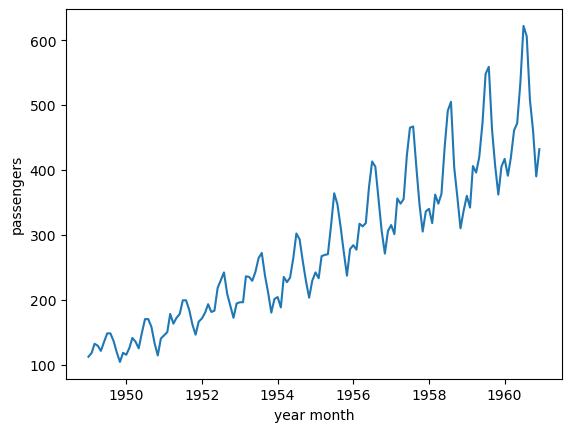

In [14]:
sns.lineplot(data = df, x =df.index, y = df.passengers)

## now we will check the stationarity through rolling test

In [15]:
df['roll mean'] = df['passengers'].rolling(window = 12).mean()
df['roll std'] = df['passengers'].rolling(window = 12).std()

In [16]:
df

,year,month,passengers,roll mean,roll std
year month,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN
...,...,...,...,...,...
1960-08-01,1960,Aug,606,463.333333,83.630500
1960-09-01,1960,Sep,508,467.083333,84.617276
1960-10-01,1960,Oct,461,471.583333,82.541954


<Axes: xlabel='year month', ylabel='passengers'>

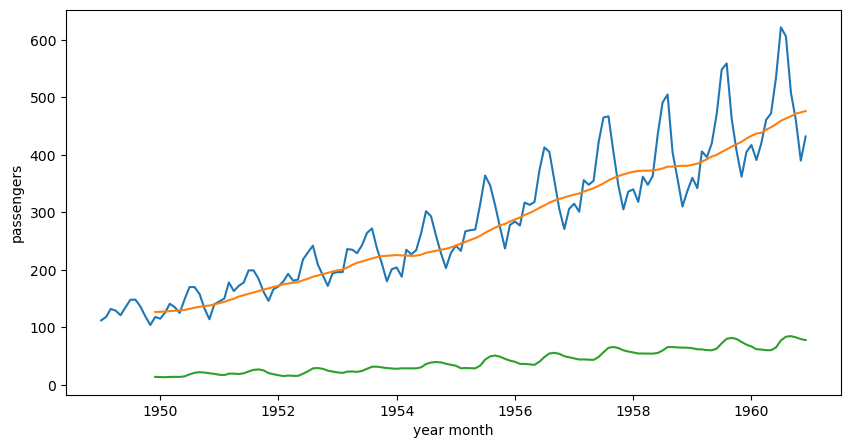

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x =df.index, y = df.passengers)
sns.lineplot(data = df, x =df.index, y = df['roll mean'])
sns.lineplot(data = df, x =df.index, y = df['roll std'])


### variance is stationary but mean isn't

### now we will apply ADF test

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adftest = adfuller(df['passengers'], autolag = 'AIC')

In [20]:
adftest

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [21]:
stats = pd.Series(adftest[0:4], index = ['test statistic', 'p value', '#lags used', 'no. of observations used'])
stats

test statistic                0.815369
p value                       0.991880
#lags used                   13.000000
no. of observations used    130.000000
dtype: float64

In [22]:
adftest[4] ## critical values

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

In [23]:
### here we can see the our critical values are less than test statistics so our data is clearly not stationary

In [24]:
df

,year,month,passengers,roll mean,roll std
year month,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN
...,...,...,...,...,...
1960-08-01,1960,Aug,606,463.333333,83.630500
1960-09-01,1960,Sep,508,467.083333,84.617276
1960-10-01,1960,Oct,461,471.583333,82.541954


In [25]:
df['shift'] = df['passengers'].shift(1)

In [26]:
df

,year,month,passengers,roll mean,roll std,shift
year month,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN,112.0
1949-03-01,1949,Mar,132,NaN,NaN,118.0
1949-04-01,1949,Apr,129,NaN,NaN,132.0
1949-05-01,1949,May,121,NaN,NaN,129.0
...,...,...,...,...,...,...
1960-08-01,1960,Aug,606,463.333333,83.630500,622.0
1960-09-01,1960,Sep,508,467.083333,84.617276,606.0
1960-10-01,1960,Oct,461,471.583333,82.541954,508.0


In [27]:
df['shift difference'] = df['passengers'] - df['shift']

In [28]:
df

,year,month,passengers,roll mean,roll std,shift,shift difference
year month,,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN,112.0,6.0
1949-03-01,1949,Mar,132,NaN,NaN,118.0,14.0
1949-04-01,1949,Apr,129,NaN,NaN,132.0,-3.0
1949-05-01,1949,May,121,NaN,NaN,129.0,-8.0
...,...,...,...,...,...,...,...
1960-08-01,1960,Aug,606,463.333333,83.630500,622.0,-16.0
1960-09-01,1960,Sep,508,467.083333,84.617276,606.0,-98.0
1960-10-01,1960,Oct,461,471.583333,82.541954,508.0,-47.0


In [29]:
df['shift roll mean'] = df['shift difference'].rolling(window = 12).mean()
df['shift roll std'] = df['shift difference'].rolling(window = 12).std()

In [30]:
df

,year,month,passengers,roll mean,roll std,shift,shift difference,shift roll mean,shift roll std
year month,,,,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN,112.0,6.0,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN,118.0,14.0,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN,132.0,-3.0,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN,129.0,-8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1960-08-01,1960,Aug,606,463.333333,83.630500,622.0,-16.0,3.916667,53.364030
1960-09-01,1960,Sep,508,467.083333,84.617276,606.0,-98.0,3.750000,53.706483
1960-10-01,1960,Oct,461,471.583333,82.541954,508.0,-47.0,4.500000,52.852281


In [31]:
adftest = adfuller(df['shift difference'].dropna(), autolag = 'AIC')

In [32]:
adftest

(-2.829266824169992,
 0.0542132902838265,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [33]:
stats = pd.Series(adftest[0:4], index = ['test statistic', 'p value', '#lags used', 'no. of observations used'])
stats

test statistic               -2.829267
p value                       0.054213
#lags used                   12.000000
no. of observations used    130.000000
dtype: float64

In [34]:
adftest[4] ## critical values

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

<Axes: xlabel='year month', ylabel='shift difference'>

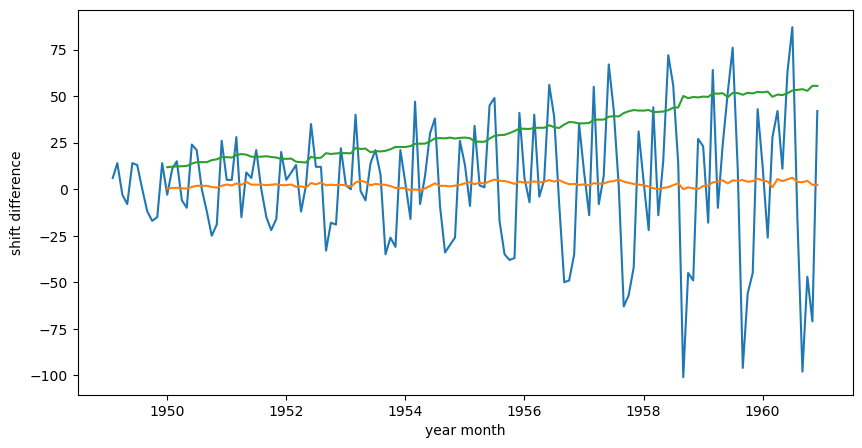

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x =df.index, y = df['shift difference'])
sns.lineplot(data = df, x =df.index, y = df['shift roll mean'])
sns.lineplot(data = df, x =df.index, y = df['shift roll std'])


In [47]:
def test_stationary(dataframe, var):
    dataframe['roll_mean'] = dataframe[var].rolling(window = 12).mean()
    dataframe['roll_std'] = dataframe[var].rolling(window = 12).std()
    
    adftest = adfuller(dataframe[var].dropna(), autolag = 'AIC')
    stats = pd.Series(adftest[0:4], index = ['test statistic', 'p value', '#lags used', 'no. of observations used'])
    print(stats)
    
    print(adftest[4]) ## critical values
    plt.figure(figsize=(10,5))
    sns.lineplot(data = dataframe, x =dataframe.index, y = var)
    sns.lineplot(data = dataframe, x =dataframe.index, y = 'roll_mean')
    sns.lineplot(data = dataframe, x =dataframe.index, y = 'roll_std')


In [41]:
log_df = df[['passengers']]
log_df

,passengers
year month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [43]:
log_df['log'] = np.log(log_df['passengers'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\2014284887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


In [42]:
log_df

,passengers
year month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\2613026360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['roll_mean'] = dataframe[var].rolling(window = 12).mean()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\2613026360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['roll_std'] = dataframe[var].rolling(window = 12).std()


test statistic               -1.717017
p value                       0.422367
#lags used                   13.000000
no. of observations used    130.000000
dtype: float64
{'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


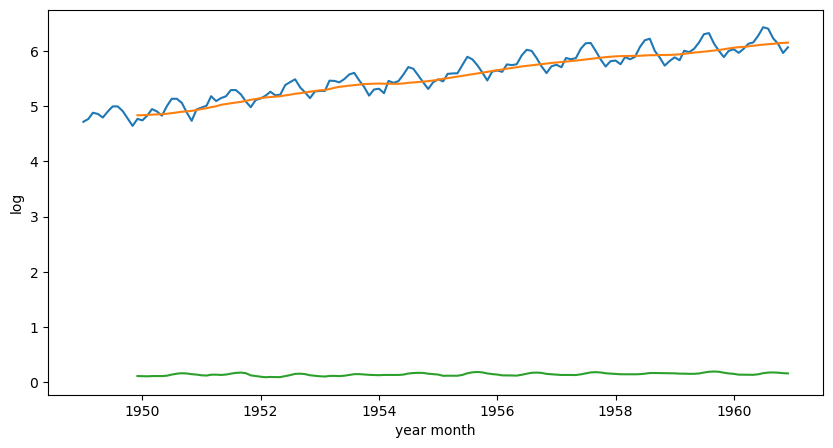

In [48]:
test_stationary(log_df, 'log')

In [51]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])
sqrt_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\3626676939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])


,passengers,sqrt
year month,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000
...,...,...
1960-08-01,606,24.617067
1960-09-01,508,22.538855
1960-10-01,461,21.470911


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\2613026360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['roll_mean'] = dataframe[var].rolling(window = 12).mean()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\2613026360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['roll_std'] = dataframe[var].rolling(window = 12).std()


test statistic               -0.345854
p value                       0.918754
#lags used                   13.000000
no. of observations used    130.000000
dtype: float64
{'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


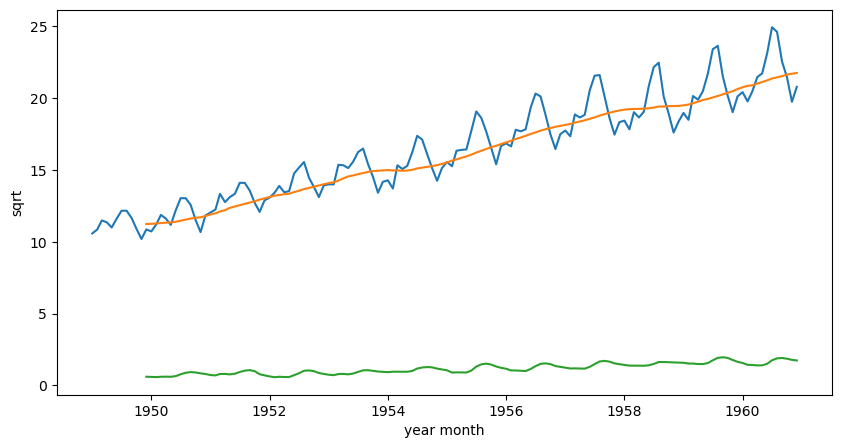

In [52]:
test_stationary(sqrt_df, 'sqrt')

In [54]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\780408841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\2613026360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['roll_mean'] = dataframe[var].rolling(window = 12).mean()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\2613026360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['roll_std'] = dataframe[var].rolling(window = 12).std()


test statistic               -0.810035
p value                       0.816157
#lags used                   13.000000
no. of observations used    130.000000
dtype: float64
{'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


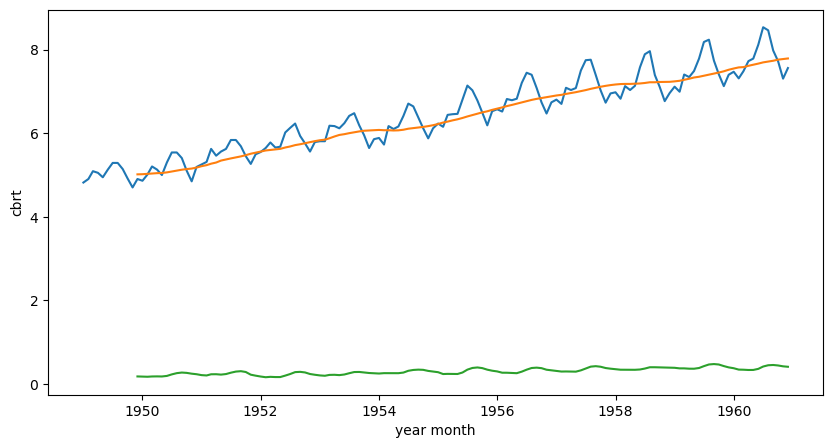

In [55]:
test_stationary(cbrt_df, 'cbrt')

In [56]:
log_df2= log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df2['log'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\43469625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df2['log'])


test statistic               -1.942528
p value                       0.312326
#lags used                   13.000000
no. of observations used    130.000000
dtype: float64
{'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


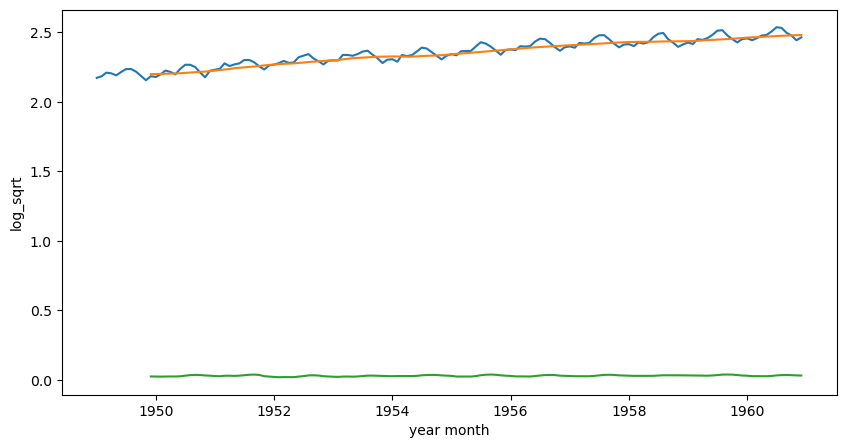

In [62]:
test_stationary(log_df2, 'log_sqrt')

In [69]:
log_df3 = log_df2[['passengers', 'log', 'log_sqrt']]
log_df3['shift'] = log_df3['log_sqrt'].shift(1)
log_df3['shift_diff'] = log_df3['log_sqrt'] - log_df3['shift']
log_df3

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\3302964998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df3['shift'] = log_df3['log_sqrt'].shift(1)


,passengers,log,log_sqrt,shift,shift_diff
year month,,,,,
1949-01-01,112,4.718499,2.172211,NaN,NaN
1949-02-01,118,4.770685,2.184190,2.172211,0.011979
1949-03-01,132,4.882802,2.209706,2.184190,0.025517
1949-04-01,129,4.859812,2.204498,2.209706,-0.005208
1949-05-01,121,4.795791,2.189929,2.204498,-0.014569
...,...,...,...,...,...
1960-08-01,606,6.406880,2.531182,2.536324,-0.005143
1960-09-01,508,6.230481,2.496093,2.531182,-0.035088
1960-10-01,461,6.133398,2.476570,2.496093,-0.019523


test statistic               -2.611019
p value                       0.090741
#lags used                   14.000000
no. of observations used    128.000000
dtype: float64
{'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}


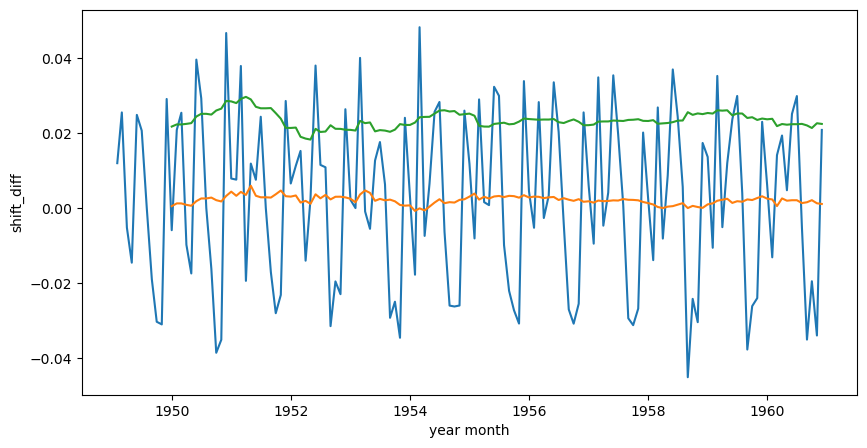

In [70]:
test_stationary(log_df3, 'shift_diff')

In [71]:
df

,year,month,passengers,roll mean,roll std,shift,shift difference,shift roll mean,shift roll std
year month,,,,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN,112.0,6.0,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN,118.0,14.0,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN,132.0,-3.0,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN,129.0,-8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1960-08-01,1960,Aug,606,463.333333,83.630500,622.0,-16.0,3.916667,53.364030
1960-09-01,1960,Sep,508,467.083333,84.617276,606.0,-98.0,3.750000,53.706483
1960-10-01,1960,Oct,461,471.583333,82.541954,508.0,-47.0,4.500000,52.852281


In [85]:
new_df = df.iloc[:, 0:5]
new_df

,year,month,passengers,roll mean,roll std
year month,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN
...,...,...,...,...,...
1960-08-01,1960,Aug,606,463.333333,83.630500
1960-09-01,1960,Sep,508,467.083333,84.617276
1960-10-01,1960,Oct,461,471.583333,82.541954


In [92]:
airp = new_df[['passengers']].copy(deep = True)
airp['firstdiff'] = airp['passengers'].diff()
airp['diff12'] = airp['passengers'].diff(12)
airp

,passengers,firstdiff,diff12
year month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
...,...,...,...
1960-08-01,606,-16.0,47.0
1960-09-01,508,-98.0,45.0
1960-10-01,461,-47.0,54.0


In [94]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

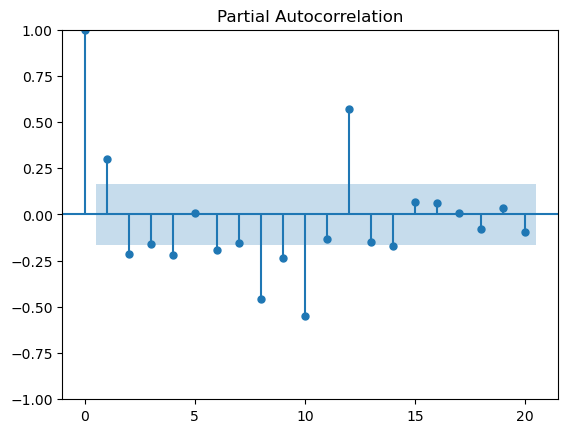

In [125]:
plot_pacf(airp['firstdiff'].dropna(), lags = 20);

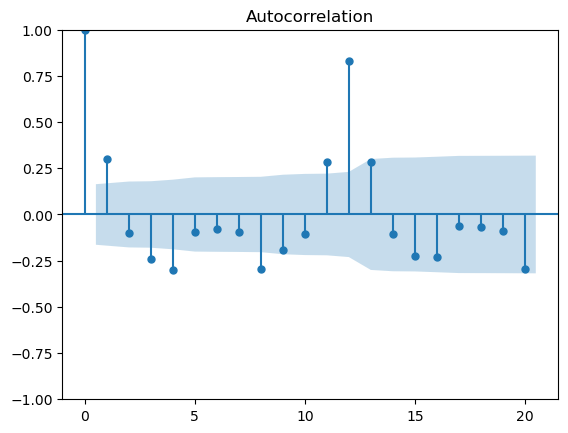

In [124]:
plot_acf(airp['firstdiff'].dropna(), lags = 20);

In [100]:
train = airp[:round(len(airp)*70/100)]
test = airp[round(len(airp)*70/100):]
test.head()

,passengers,firstdiff,diff12
year month,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [114]:

from statsmodels.tsa.arima.model import ARIMA
order = (1, 1, 3)
model = ARIMA(train['passengers'], order=order)
fit_model = model.fit()

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [115]:
prediction = fit_model.predict(start = test.index[0], end = test.index[-1])
airp['arimapred'] = prediction
airp.tail()

,passengers,firstdiff,diff12,arimapred
year month,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='year month', ylabel='passengers'>

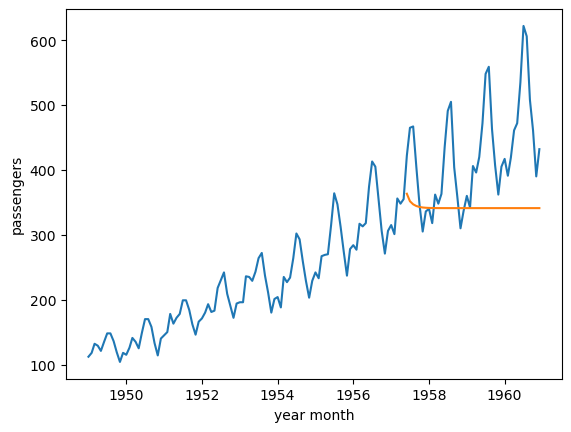

In [133]:
airp.dropna()
sns.lineplot(data = airp, x = airp.index, y = 'passengers')
sns.lineplot(data = airp, x = airp.index, y = 'arimapred')

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
np.sqrt(mean_squared_error(test['passengers'], prediction))

111.11010326020424

In [121]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

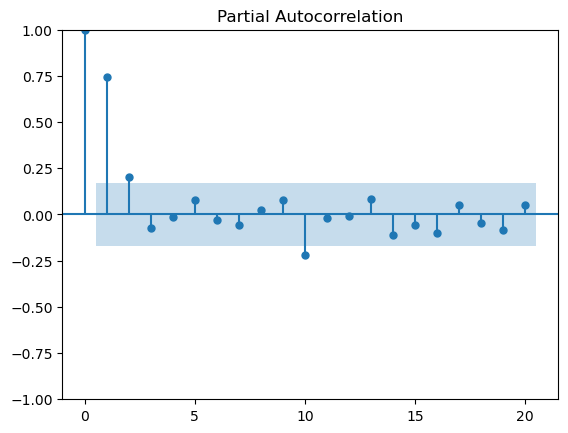

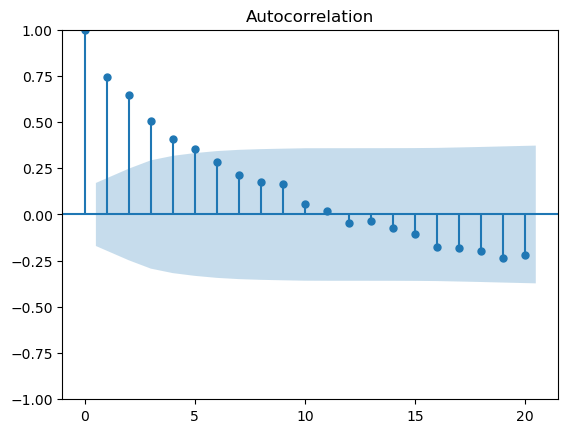

In [136]:
plot_pacf(airp['diff12'].dropna(), lags = 20);
plot_acf(airp['diff12'].dropna(), lags = 20);

In [145]:
order = (1, 1, 3)
model = SARIMAX(train['passengers'], order=order, seasonal_order=(2,1,2,12))
fit_model = model.fit()

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [146]:
prediction = fit_model.predict(start = test.index[0], end = test.index[-1])
airp['sarimaxpred'] = prediction
airp.tail()

,passengers,firstdiff,diff12,arimapred,sarimapred,sarimaxpred
year month,,,,,,
1960-08-01,606,-16.0,47.0,341.111333,599.449820,598.376057
1960-09-01,508,-98.0,45.0,341.111333,534.558236,534.002436
1960-10-01,461,-47.0,54.0,341.111333,479.570981,478.782731
1960-11-01,390,-71.0,28.0,341.111333,431.904725,431.427659
1960-12-01,432,42.0,27.0,341.111333,477.420058,476.792962


<Axes: xlabel='year month', ylabel='passengers'>

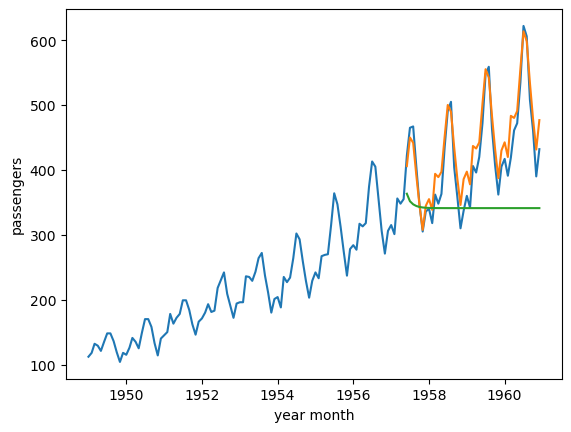

In [148]:
airp.dropna()
sns.lineplot(data = airp, x = airp.index, y = 'passengers')
sns.lineplot(data = airp, x = airp.index, y = 'sarimaxpred')
sns.lineplot(data = airp, x = airp.index, y = 'arimapred')

In [149]:
np.sqrt(mean_squared_error(test['passengers'], prediction))

27.486082674272414

In [154]:
future_dates = pd.DataFrame(pd.date_range(start = '1961-01-01', end = '1962-12-01', freq = 'MS'), columns = ['Dates'])
future_dates.set_index('Dates', inplace = True)

<Axes: xlabel='year month', ylabel='passengers'>

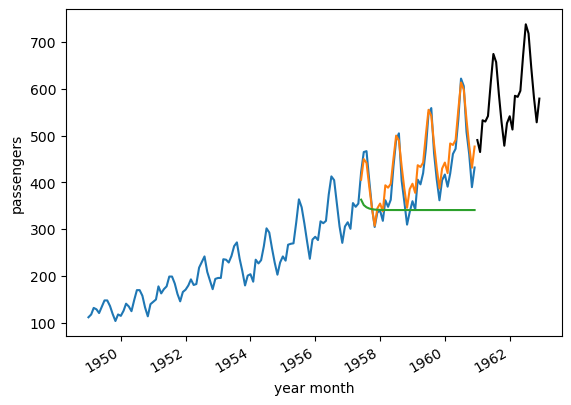

In [158]:
airp.dropna()
sns.lineplot(data = airp, x = airp.index, y = 'passengers')
sns.lineplot(data = airp, x = airp.index, y = 'sarimaxpred')
sns.lineplot(data = airp, x = airp.index, y = 'arimapred')
fit_model.predict(start = future_dates.index[0], end = future_dates.index[-1]).plot(color = 'black')